In [41]:
import os
import numpy as np
import scipy.io as sio
import mne

In [42]:
raw = mne.io.read_raw_fif('Reconstructed_Continuous_DASS21/reconstructed_DASS-Shuvam-18-09-18_20180918_125155_fil_raw.fif', preload=True)
raw.rename_channels(mapping={'EEG 1': 'Fp1', 'EEG 2': 'Fp2', 'EEG 3': 'F3', 'EEG 4': 'F4', 'EEG 5': 'C3', \
                               'EEG 6': 'C4', 'EEG 7': 'P3', 'EEG 8': 'P4', 'EEG 9': 'O1', 'EEG 10': 'O2', \
                               'EEG 11': 'F7', 'EEG 12': 'F8', 'EEG 13': 'T3', 'EEG 14': 'T4', 'EEG 15': 'P7', \
                               'EEG 16': 'P8', 'EEG 17': 'Fz', 'EEG 19': 'Pz', 'EEG 20': 'Oz', 'EEG 27': 'Fpz', \
                               'EEG VREF': 'Cz'})

Opening raw data file Reconstructed_Continuous_DASS21/reconstructed_DASS-Shuvam-18-09-18_20180918_125155_fil_raw.fif...
Isotrak not found
    Range : 0 ... 55249 =      0.000 ...   220.996 secs
Ready.
Reading 0 ... 55249  =      0.000 ...   220.996 secs...


<Raw | reconstructed_DASS-Shuvam-18-09-18_20180918_125155_fil_raw.fif, 33 x 55250 (221.0 s), ~14.0 MB, data loaded>

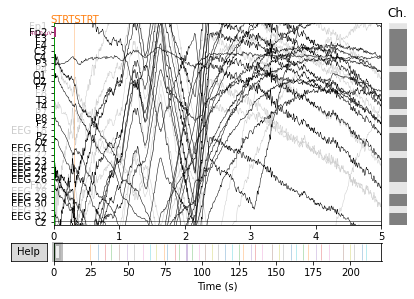

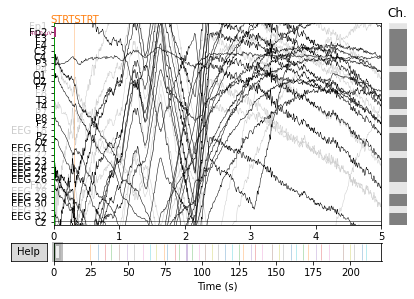

In [43]:
raw.plot(duration=5, n_channels=33)

In [44]:
pick_Frontal_channels =  mne.pick_channels(raw.ch_names, ['Fp1', 'Fp2', 'Fz', 'F3', 'F4', 'F7', 'F8'])
pick_Frontal_and_Central_channels =  mne.pick_channels(raw.ch_names, ['Fp1', 'Fp2', 'Fz', 'F3', 'F4', 'F7', 'F8', 'Cz', 'C3', 'C4'])
pick_Parietal_and_Central_channels =  mne.pick_channels(raw.ch_names, ['Pz', 'P3', 'P4', 'P7', 'P8','Cz', 'C3', 'C4'])

In [45]:
events_from_annot, event_dict = mne.events_from_annotations(raw)

Used Annotations descriptions: ['Q012', 'Q01B', 'Q023', 'Q02B', 'Q030', 'Q03B', 'Q040', 'Q04B', 'Q052', 'Q05B', 'Q062', 'Q06B', 'Q070', 'Q07B', 'Q08B', 'Q092', 'Q09B', 'Q102', 'Q10B', 'Q110', 'Q11B', 'Q121', 'Q12B', 'Q131', 'Q13B', 'Q142', 'Q14B', 'Q150', 'Q15B', 'Q160', 'Q16B', 'Q171', 'Q17B', 'Q180', 'Q18B', 'Q190', 'Q19B', 'Q200', 'Q20B', 'Q211', 'Q21B', 'STRTSTRT']


### Question numbers for categories

#d : 3,5,10,13,16,17,21

#a : 2,4,7,9,15,19,20

#s : 1,6,8,11,12,14,18

# Alpha range 8-12 Hz

In [46]:
raw_alpha = raw.copy().filter(l_freq=8, h_freq=12)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.652 sec)



In [49]:
epochs = mne.Epochs(raw_alpha, events_from_annot, tmin=-0.3, tmax=0.7, event_id=event_dict, picks = pick_Frontal_channels, preload=True)

43 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 43 events and 251 original time points ...
0 bad epochs dropped


### Depression FIX

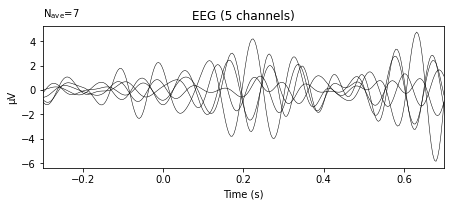

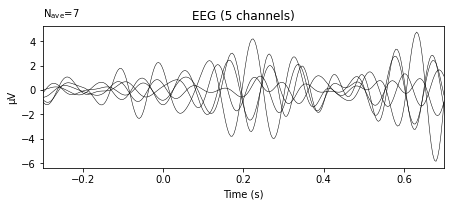

In [54]:
evoked = epochs['Q03B','Q05B','Q10B','Q13B','Q16B','Q17B','Q21B'].average()
evoked.plot()

### Anxiety FIX

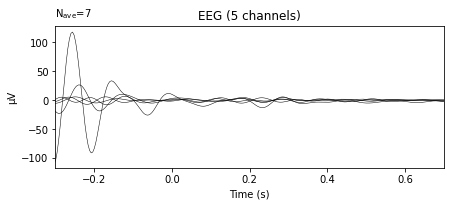

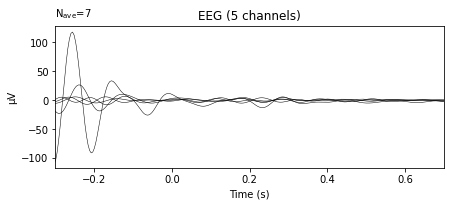

In [55]:
evoked = epochs['Q02B','Q04B','Q07B','Q09B','Q15B','Q19B','Q20B'].average()
evoked.plot()

### Stress FIX

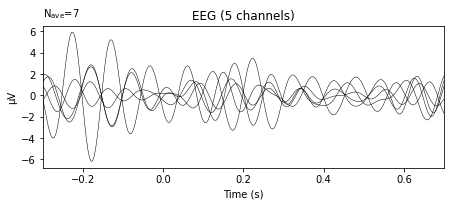

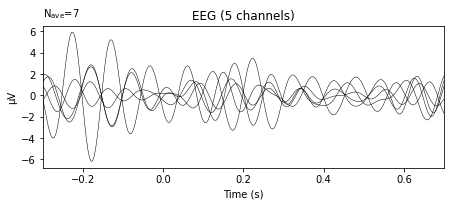

In [50]:
evoked = epochs['Q01B', 'Q06B', 'Q08B', 'Q11B', 'Q12B', 'Q14B', 'Q18B'].average()
evoked.plot()

### Depression RESP

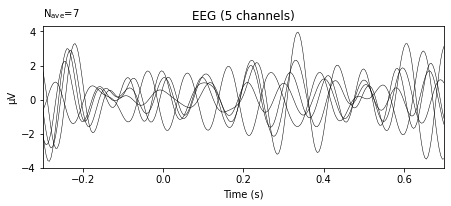

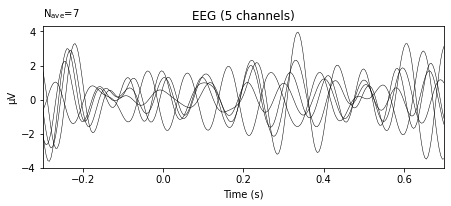

In [59]:
evoked = epochs['Q030','Q052','Q102','Q131','Q160','Q171','Q211'].average()
evoked.plot()

### Anxiety RESP

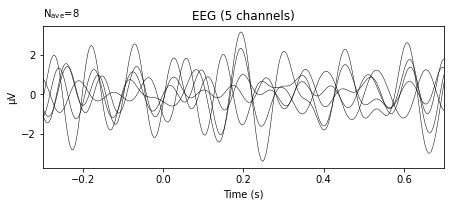

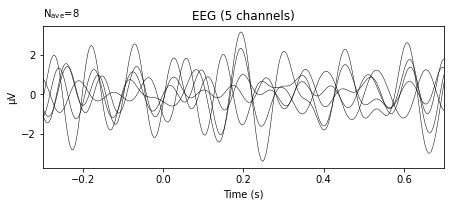

In [60]:
evoked = epochs['Q023','Q040','Q070','Q092','Q150','Q190','Q200'].average()
evoked.plot()

### Stress RESP

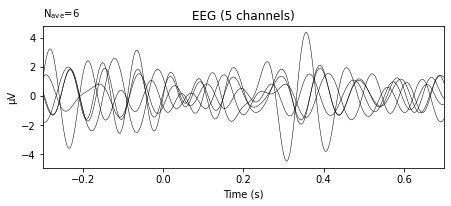

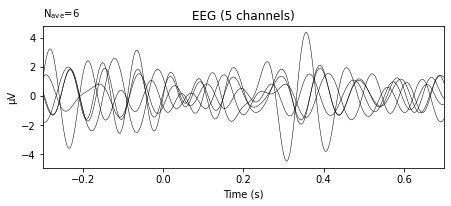

In [61]:
evoked = epochs['Q012', 'Q062', 'Q110', 'Q121', 'Q142', 'Q180'].average()
evoked.plot()